# Pima Diabetes - 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [3]:
colnames=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
pima_df = pd.read_csv("pima-indians-diabetes-2.data", names= colnames)

In [4]:
pima_df.shape

(768, 9)

In [5]:
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
pima_df[~pima_df.applymap(np.isreal).all(1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [7]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [14]:
pima_df.groupby(['Outcome']).count() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


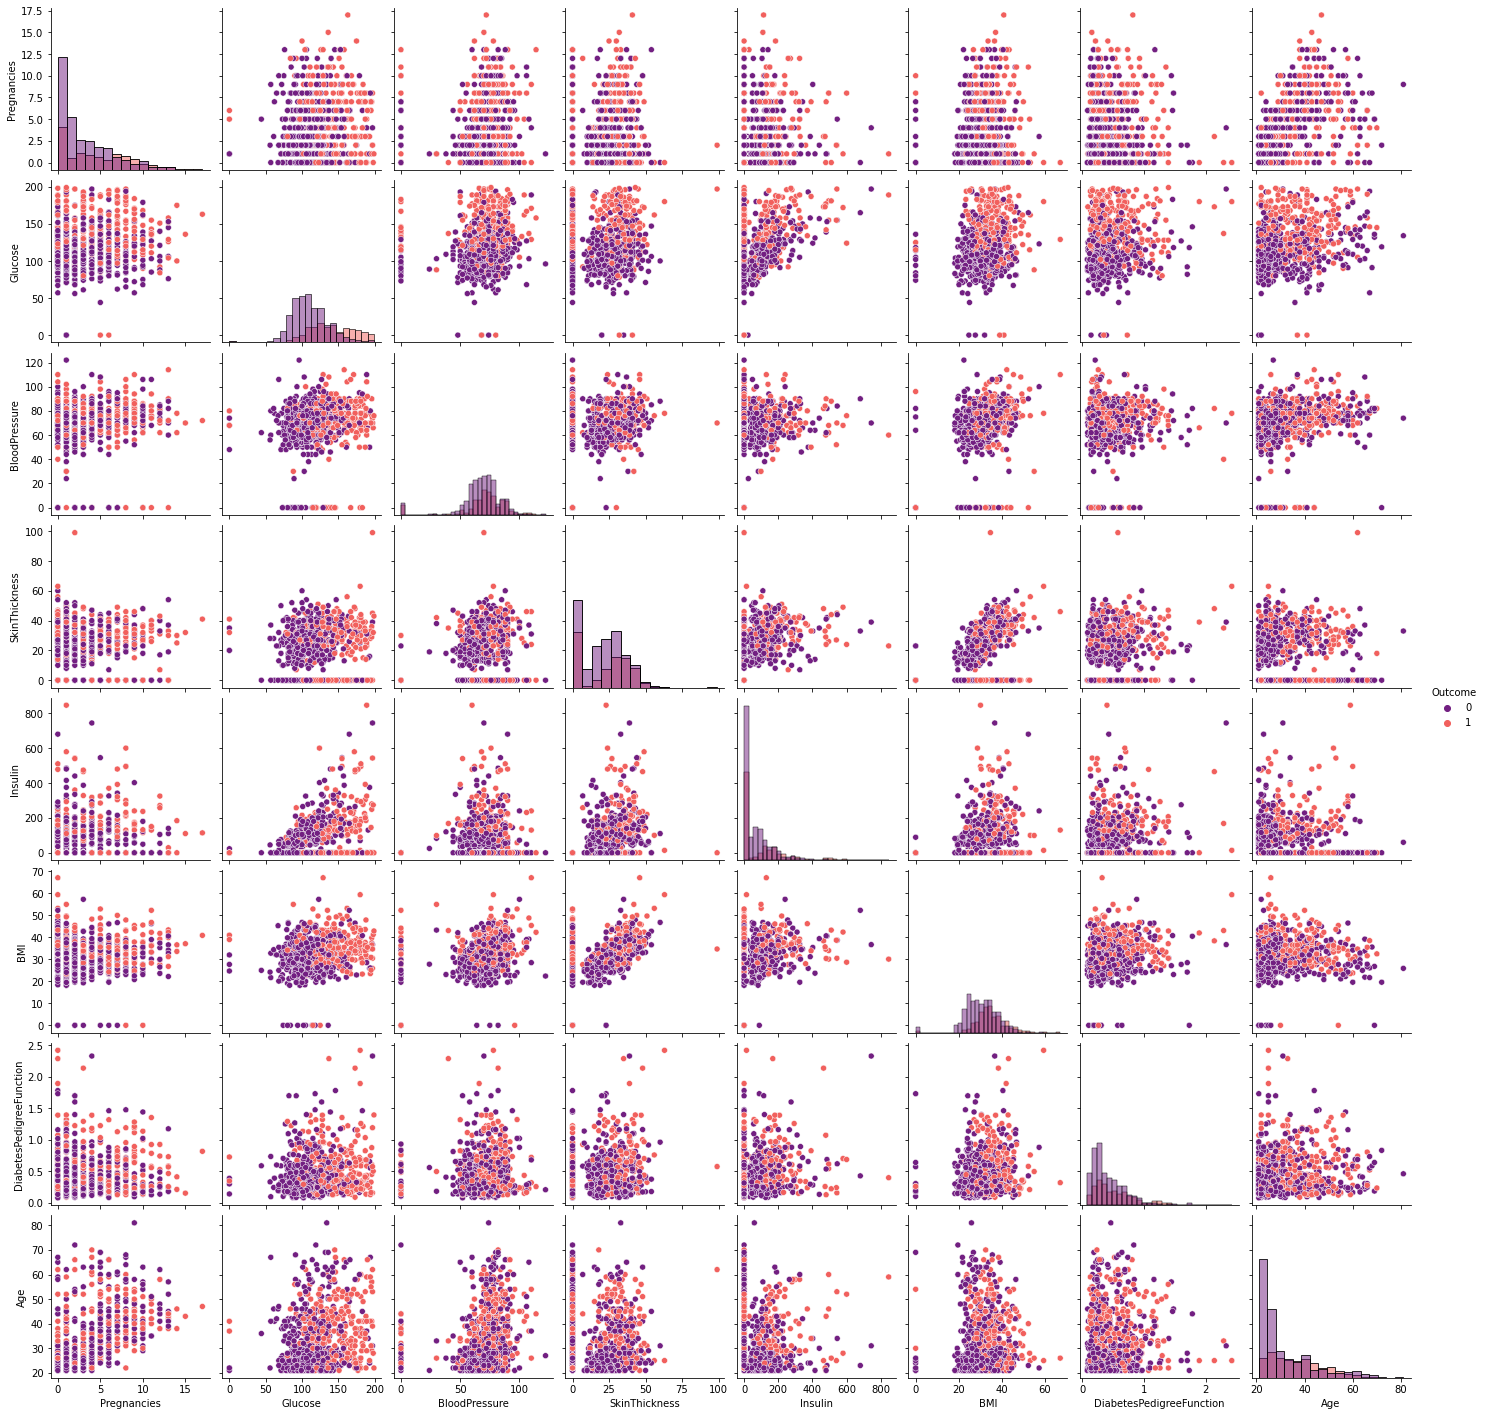

In [22]:
sns.pairplot(pima_df,diag_kind='hist',hue='Outcome',palette='magma')

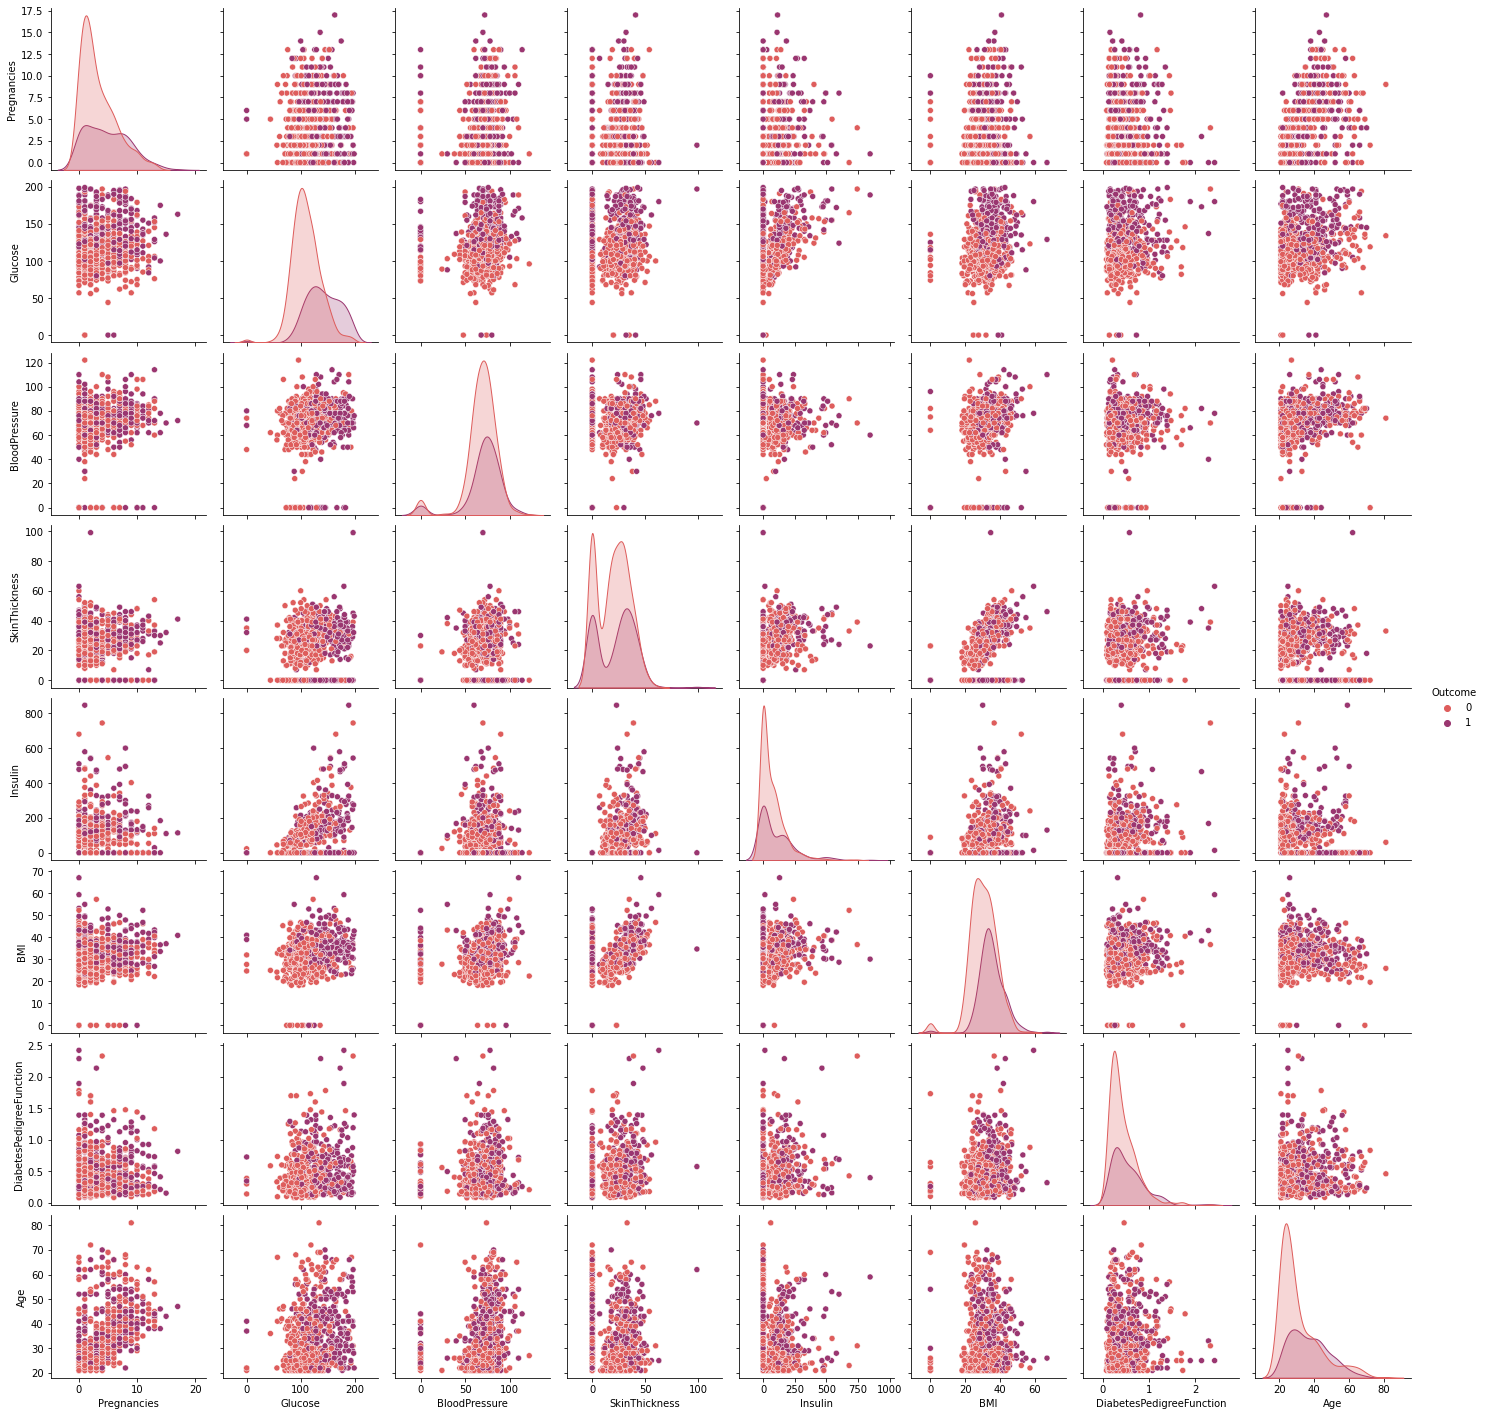

In [24]:
sns.pairplot(pima_df,diag_kind='kde',hue='Outcome',palette='mako')

In [26]:
array=pima_df.values
X=array[:,0:7]
Y=array[:,8]
test_size=0.30
seed=7
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=test_size,random_state=seed)
type(X_train)

numpy.ndarray

In [27]:
X_test.shape

(231, 7)

In [29]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
model_score=model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_predict))

0.7619047619047619
[[131  16]
 [ 39  45]]


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.7705627705627706
[[130  17]
 [ 36  48]]


In [31]:
y_predict

array([0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 1.

In [37]:
from sklearn import preprocessing
X_train_scaled=preprocessing.scale(X_train)
X_test_scaled=preprocessing.scale(X_test)

In [39]:
model=LogisticRegression()
model.fit(X_train_scaled,y_train)
y_predict=model.predict(X_test_scaled)
model_score=model.score(X_test_scaled,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_predict))

0.7792207792207793
[[134  13]
 [ 38  46]]
